In [1]:
import sys
sys.path.insert(0, "/Users/oozguc/PyImage/utils")
import numpy as np
from PIL import Image
import os
from tifffile import imread
import matplotlib.pyplot as plt
from Normalize import normalizeFloat, normalizeMinMax, Path, save_tiff_imagej_compatible
from plot_utils import singleplot, plotXY, doubleplot
from GaussFit import StripFit, Linescan
from HoughLine import show_hough_linetransform, show_ransac_points_line
from bokeh.models import Label
from bokeh.plotting import figure, show, output_notebook

In [2]:
targetdir = '/Users/oozguc/Desktop/cortexthickness_1x16_2x16_4x16'

Actinimage = '/Users/oozguc/Desktop/cortexthickness_1x16_2x16_4x16/Ch2Linescan_C2-1900408_2x16TrackID1.tif'

Membraneimage = '/Users/oozguc/Desktop/cortexthickness_1x16_2x16_4x16/Ch1Linescan_C2-1900408_2x16TrackID1.tif'


#Enter time unit in seconds
Time_unit = 5
#Enter pixel to micrometer conversion
Xcalibration = 0.1032
#Enter the number of pixels to be included in the fit
Fitaround= 10

#Symmetric psf as input (micrometers)
psf = 0.17
showaftertime = 100
inisigmaguess =  psf
#Size of linescan
skip = 50
singleblock = 80 

#Number of segments
numsegments = 10
id = []
for i in range(0, numsegments):
    id.append(i)


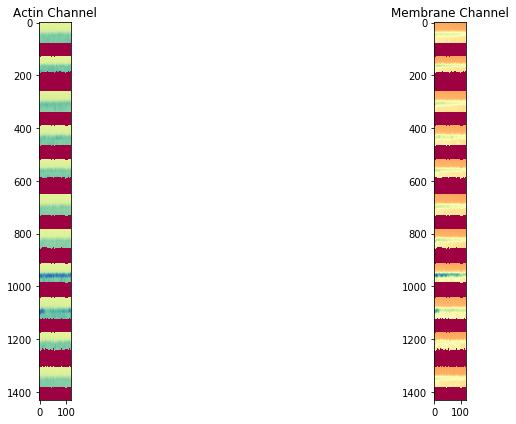

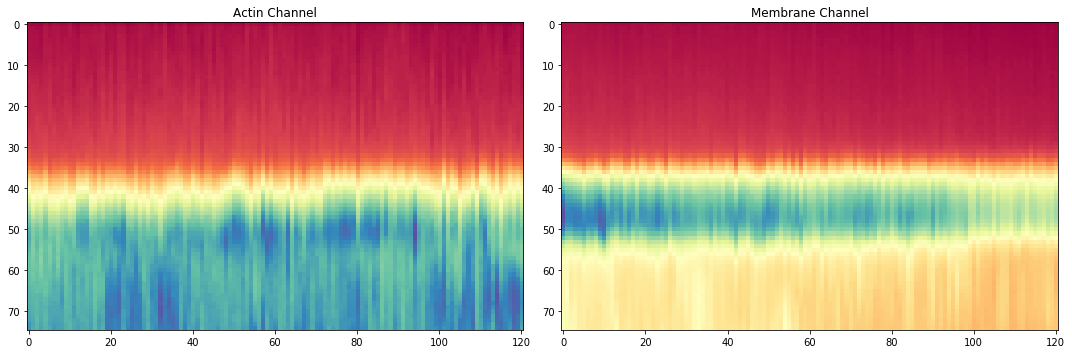

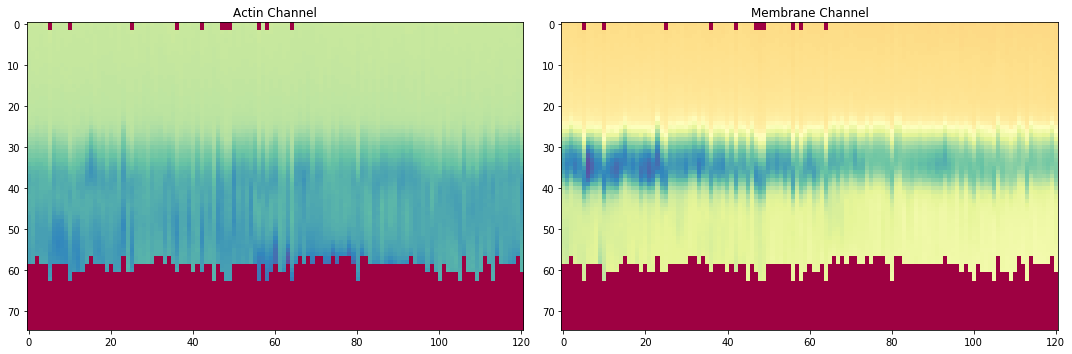

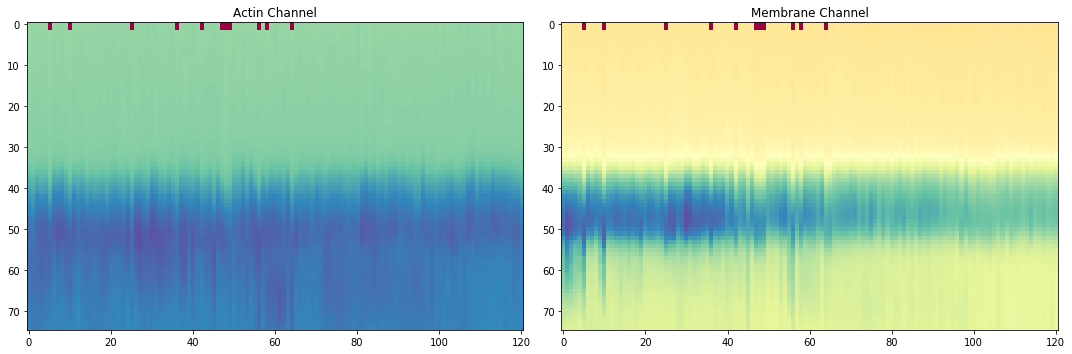

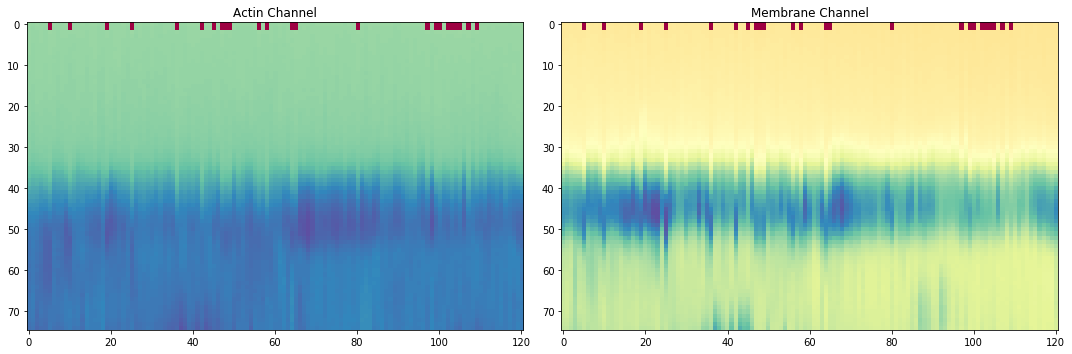

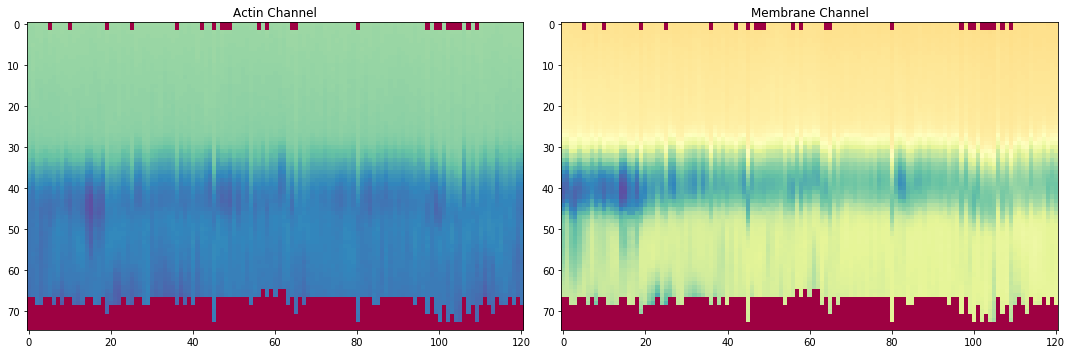

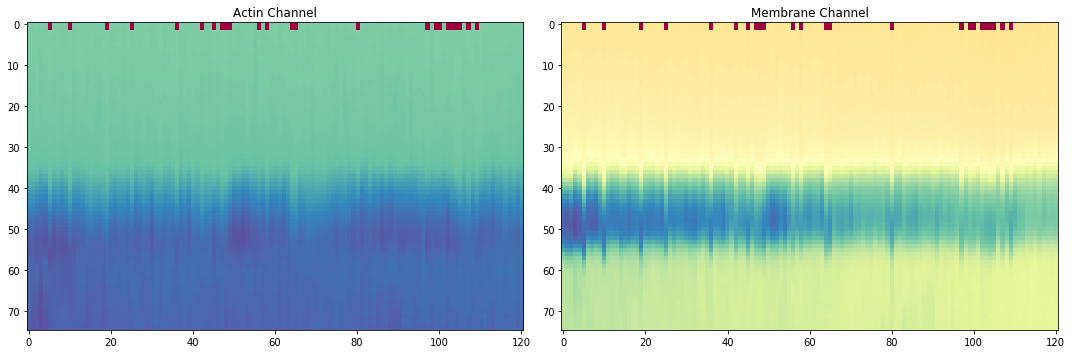

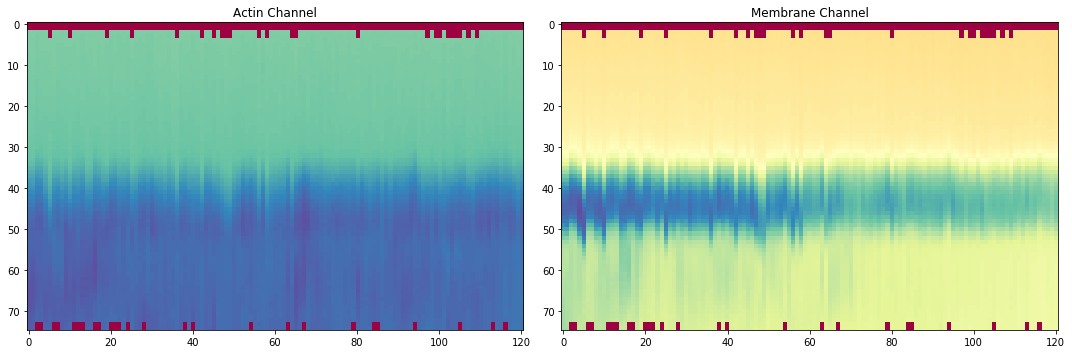

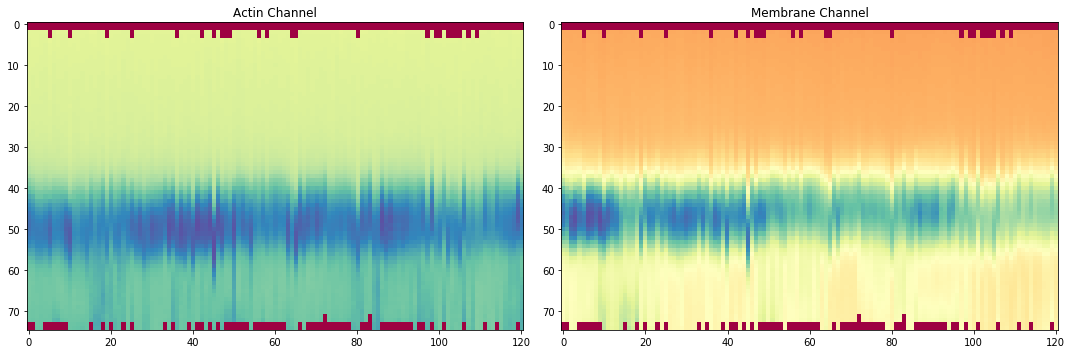

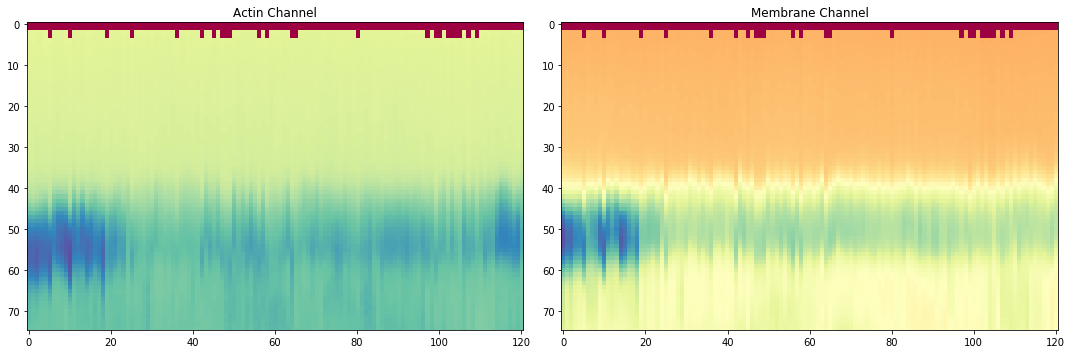

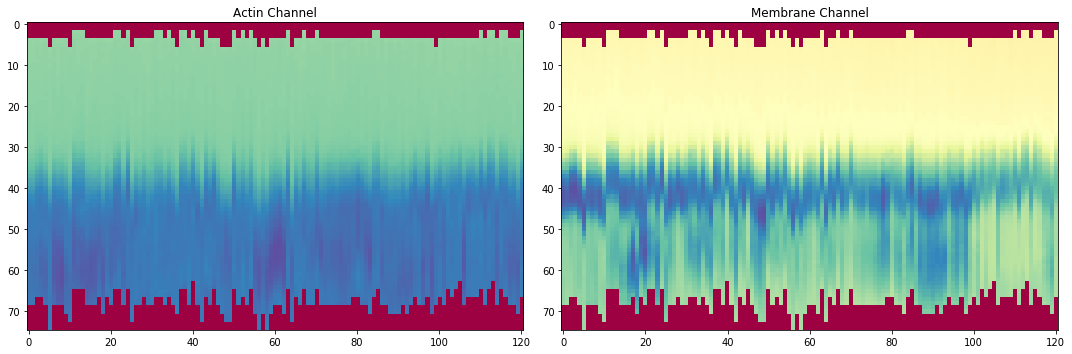

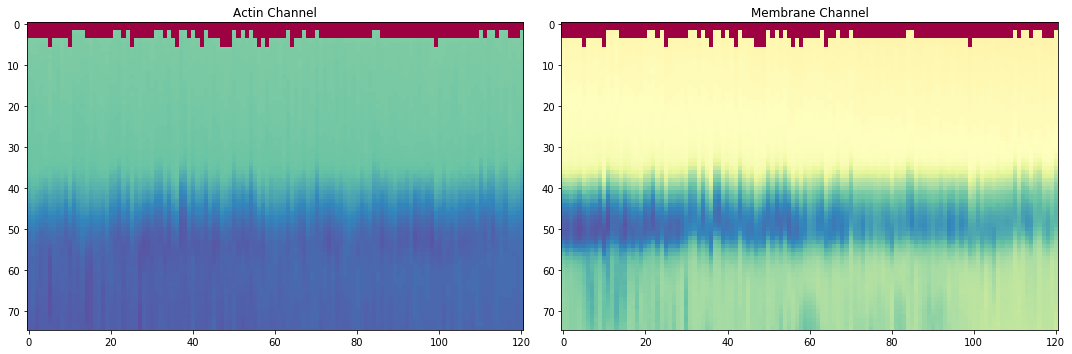

In [3]:
Actin = imread(Actinimage)
Membrane = imread(Membraneimage)

doubleplot(Actin, Membrane, 'Actin Channel', 'Membrane Channel')
blockimageActin = []
blockimageMembrane = []

i = 0
while i < Actin.shape[0]:
       
   blockActin = Actin[i:i + singleblock-5,:]
   blockMembrane = Membrane[i:i + singleblock-5,:]
   
   blockimageActin.append(blockActin)
   blockimageMembrane.append(blockMembrane)
   doubleplot(blockActin, blockMembrane, 'Actin Channel', 'Membrane Channel')
   i = i + singleblock + skip 

halflength = int(len(blockimageActin)/2)
otherhalf = len(blockimageActin) - halflength
totallength = len(blockimageActin)


block id 1
Time point: 0
Membrane Fit: [527.10465076   1.08264347   4.74120254  61.73512844]
Actin Fit: [173.06714614   1.60661708   5.43612883  88.86926425]


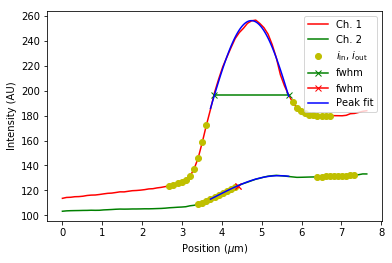

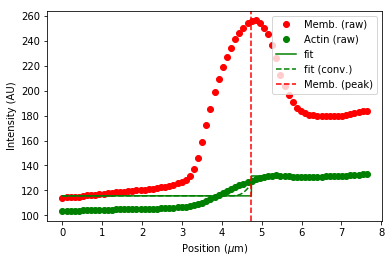

Thickness (min) 1.348328488479677 nm
Thickness (median) 5.607272098512811 nm
Thickness (max) 7.925353895964004 nm
Ransac Slope =  3.092e-06
Regression Slope =  3.092e-06
Mean Thickness (After outlier removal) =  0.005 um


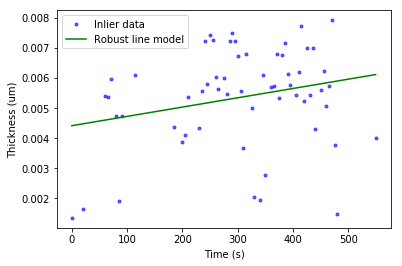

Loading BokehJS ...

block id 2


/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:
%%time
#Fit all blocks

for i in range(0, totallength):
 print('block id', i+1)   
 Actin = blockimageActin[i]
 Membrane = blockimageMembrane[i]
 Thickness, Time = StripFit(Membrane, Actin, Time_unit, Xcalibration, Fitaround, psf, inisigmaguess, showaftertime)
 

   
 
 print("Thickness (min)",np.min(Thickness) *1000, "nm")
 print("Thickness (median)",np.median(Thickness) *1000, "nm")
 print("Thickness (max)",np.max(Thickness) *1000, "nm")
 Thickness_time = np.column_stack([Time, Thickness]) 

 show_ransac_points_line(Thickness_time, min_samples=2, residual_threshold=0.5, max_trials=1000, Xrange = Time[-1], displayoutlier = False)
    
    

 hist, edges = np.histogram((Thickness), density=False, bins='auto')
 p = figure(title="Estimated Cortex Thickness = " + str('%.5f'%np.abs(edges[np.argmax(hist)] * 1000)) + 'nm', y_axis_label='Counts',x_axis_label='Thickness(um)')
 listedges = edges.tolist()
 listhist = hist.tolist()
 output_notebook()
 p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
    fill_color="#036564", line_color="#033649")
 for  i in range(0,len(listhist)):
  if listhist[i] > 0:
   mytext = Label(x=listedges[i], y=listhist[i], text=str('%.4f'%listedges[i]))
   p.add_layout(mytext)
 show(p)